<a href="https://colab.research.google.com/github/darthfelipe21/LangGraph/blob/main/LangGraphMultiAgentPythonTool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

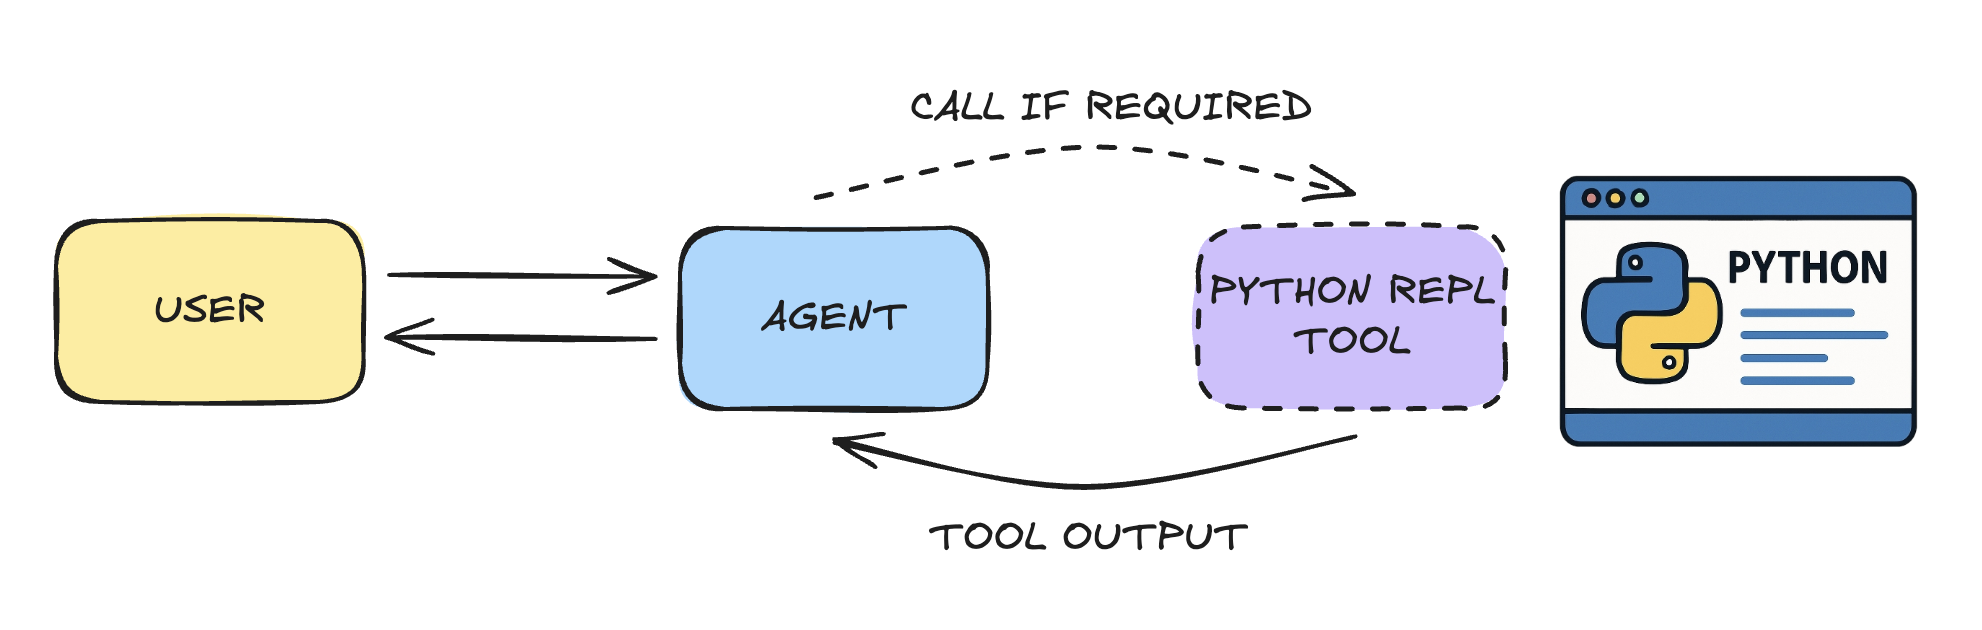

### 💻 Tool 3: Generating and running Python code

The third and final tool you'll need is something to run code to output visualizations based on the stock data retrieved by the Stock performance tool.

This tool uses the `PythonREPL` class, which is available out-of-the-box through LangChain's experimental library, `langchain_experimental`. This class reads Python code written in a string, executes it, and returns the results.

In our agents, the LLM will determine that this tool is required for visualization, generate the code to create the visualization, and call the tool with the code as an input.

In [ ]:
!pip install --quiet langchain-core==0.3.59 langchain-experimental==0.3.4

In [ ]:
from langchain_core.tools import tool
from typing import Annotated
from langchain_experimental.utilities import PythonREPL

repl = PythonREPL()

@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user. The chart should be displayed using `plt.show()`."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    return f"Successfully executed the Python REPL tool.\n\nPython code executed:\n\`\`\`python\n{code}\n\`\`\`\n\nCode output:\n\`\`\`\n{result}\`\`\`"

**Invoke `python_repl_tool()` on the `code` variable provided and view the code output.**

In [ ]:
code = f"""
import numpy as np

arr = np.arange(0, 9)
print(arr)
print(2 * arr)
"""

print(python_repl_tool.invoke({"code": code}))